# Problem Statement and Data Description

<p>Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:</p>
<ol>
<li>Satisfaction Level</li>
<li>Last evaluation</li>
<li>Number of projects</li>
<li>Average monthly hours</li>
<li>Time spent at the company</li>
<li>Whether they have had a work accident</li>
<li>Whether they have had a promotion in the last 5 years</li>
<li>Departments (column sales)</li>
<li>Salary</li>
<li>Whether the employee has left</li>
</ol>

In [2]:
import numpy as np
import pandas as pd

In [3]:
Data=pd.read_csv('../Data/HRA.csv')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


sales a salary have texual data and the rest have numerical data

In [4]:
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



<p>sales and salary are categorical and let's see if "Work_accident" and "promotion_last_5years" 
are categorical or not.</p>


In [4]:
def getunique(colname):
    return Data.loc[:,colname].unique()

In [5]:
arr =['Work_accident','left','promotion_last_5years','sales','salary']
for i in arr:
    print(i,getunique(i))

Work_accident [0 1]
left [1 0]
promotion_last_5years [0 1]
sales ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary ['low' 'medium' 'high']


Clearly Work_accident and promotion_last_5years are categorical variables.
<ul>
<li>Sales: contains 10 unique features</li>
<li>Salary: contains 3 unique features</li>

In [6]:
Data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There are no null values in dataset. In this dataset we don't need to impute any null values.

# Exploratory Data Analysis : Categorical Variables

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [8]:
def eda(col):
    grp=Data['left'].groupby(Data[col]).value_counts()
    left=grp.loc[:,1]
    not_left=grp.loc[:,0]
    rate=left/(left+not_left)
    df=pd.DataFrame({'total':left+not_left,'left':left,'not_left':not_left,'rate':rate})
    df=df.sort_values(by='rate',ascending=False)
    df['rate'].plot(secondary_y = True, label='rate',colormap=plt.get_cmap('jet') ,
                    title='Rate vs Total - ' + col)
    df['total'].plot(kind='bar', label='total_count')
    plt.savefig(col+'.png')
    return df
    

,left,not_left,rate,total
sales,,,,
hr,215,524,0.290934,739
accounting,204,563,0.265971,767
technical,697,2023,0.256250,2720
support,555,1674,0.248991,2229
sales,1014,3126,0.244928,4140
marketing,203,655,0.236597,858
IT,273,954,0.222494,1227
product_mng,198,704,0.219512,902
RandD,121,666,0.153748,787


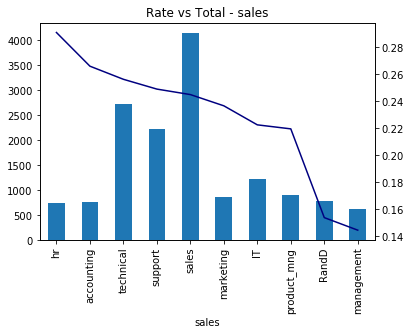

In [9]:
eda('sales')

<ul>
<li>Peopl who are in HR and accounting departments are more likely to leave the company</li>
<li>People in RandD and management department are less likely to leave</li>

,left,not_left,rate,total
salary,,,,
low,2172,5144,0.296884,7316
medium,1317,5129,0.204313,6446
high,82,1155,0.066289,1237


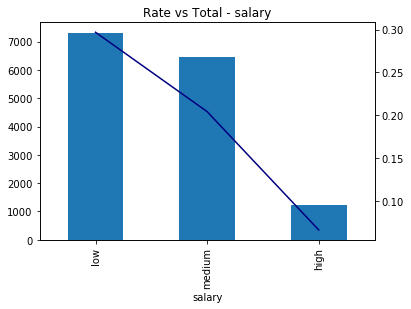

In [10]:
eda('salary')

<ul>
<li>People who have low salary are more likely to leave than medium and high salary.</li>
<li>As obvious people with higher salary are very less likely to leave company.</li>
</ul>

,left,not_left,rate,total
Work_accident,,,,
0,3402,9428,0.265160,12830
1,169,2000,0.077916,2169


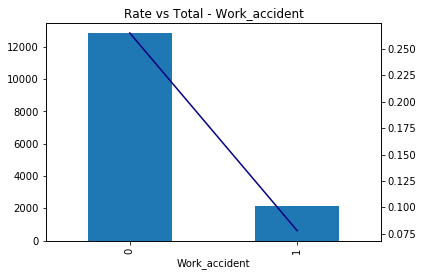

In [11]:
eda('Work_accident')

<ul>
<li>In this case people who didn't had any accidents are more likely to leave. </li>
</ul>

,left,not_left,rate,total
promotion_last_5years,,,,
0,3552,11128,0.241962,14680
1,19,300,0.059561,319


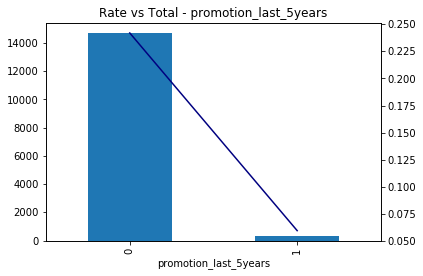

In [12]:
eda('promotion_last_5years')

<ul>
<li>As obvious People who didn't had promotion in last 5 years are very much likely to leave.</li>
</ul>

# Exploratory Data Analysis -- Numerical variable

In [13]:
def edaNum(col):
    left=pd.DataFrame(Data[Data.left==1][col].describe())
    stay=pd.DataFrame(Data[Data.left==0][col].describe())
    print(left.merge(stay,left_index=True,right_index=True))
    sns.violinplot(x='left',y=col,data=Data)
    plt.savefig(col+'.png')

       satisfaction_level_x  satisfaction_level_y
count           3571.000000          11428.000000
mean               0.440098              0.666810
std                0.263933              0.217104
min                0.090000              0.120000
25%                0.130000              0.540000
50%                0.410000              0.690000
75%                0.730000              0.840000
max                0.920000              1.000000


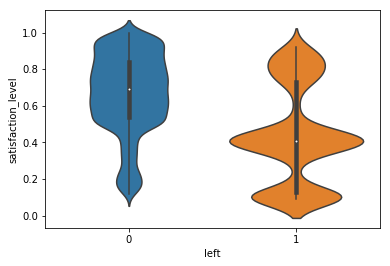

In [14]:
edaNum('satisfaction_level')

As per above table and violin distribution graph we can see a obvious thing as people who left were not much satisfied. Most of the people who stay (75%) had satisfaction level more than 0.5. Whereas people who left are categorized into three groups. First who had very less satisfaction level. Second group had satisfaction level around 0.4 and last group had around 0.9

       last_evaluation_x  last_evaluation_y
count        3571.000000       11428.000000
mean            0.718113           0.715473
std             0.197673           0.162005
min             0.450000           0.360000
25%             0.520000           0.580000
50%             0.790000           0.710000
75%             0.900000           0.850000
max             1.000000           1.000000


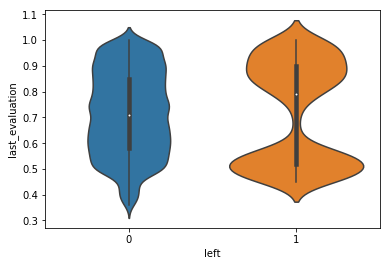

In [15]:
edaNum('last_evaluation')

Distribution for people who left shows bi-modal graph. Here some people had very low evaluation, so of course they left. Few people had higher evaluation but still left

       number_project_x  number_project_y
count       3571.000000      11428.000000
mean           3.855503          3.786664
std            1.818165          0.979884
min            2.000000          2.000000
25%            2.000000          3.000000
50%            4.000000          4.000000
75%            6.000000          4.000000
max            7.000000          6.000000


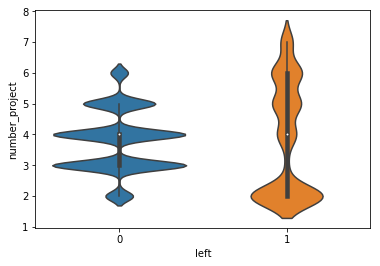

In [16]:
edaNum('number_project')

People who had very less projects left and even people who had many projects left due to over pressure.

       average_montly_hours_x  average_montly_hours_y
count             3571.000000            11428.000000
mean               207.419210              199.060203
std                 61.202825               45.682731
min                126.000000               96.000000
25%                146.000000              162.000000
50%                224.000000              198.000000
75%                262.000000              238.000000
max                310.000000              287.000000


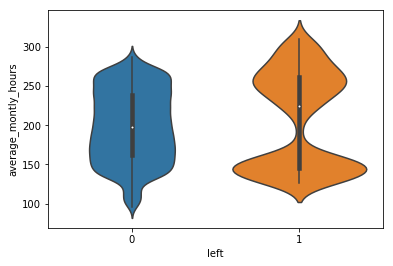

In [17]:
edaNum('average_montly_hours')

Some people were working very hard and spending extra monthly hours left due to work pressure.

       time_spend_company_x  time_spend_company_y
count           3571.000000          11428.000000
mean               3.876505              3.380032
std                0.977698              1.562348
min                2.000000              2.000000
25%                3.000000              2.000000
50%                4.000000              3.000000
75%                5.000000              4.000000
max                6.000000             10.000000


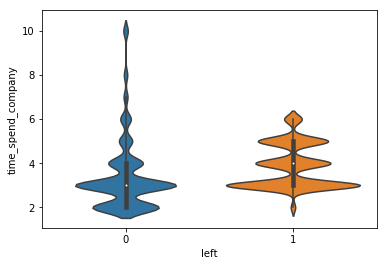

In [18]:
edaNum('time_spend_company')

Clearly who worked less than 4 years were more likely to leave

# Building a Model


In [7]:
#spliting the data into dependent(y) and independent variables (x)
x=Data.drop('left',axis=1).values
y=Data.loc[:,'left'].values

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
#clearly "Sales" and "Salary" columns need to be changed into numerical variables
label_x1=LabelEncoder()
x[:,7]=label_x1.fit_transform(x[:,7])
label_x2=LabelEncoder()
x[:,8]=label_x2.fit_transform(x[:,8])

ohe_x1=OneHotEncoder(categorical_features=[7])
x=ohe_x1.fit_transform(x).toarray()
x=x[:,1:]

ohe_x2=OneHotEncoder(categorical_features=[16])
x=ohe_x2.fit_transform(x).toarray()
x=x[:,1:]

In [10]:
from sklearn.model_selection import train_test_split
#spliting the data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

Model training

In [11]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [12]:
#choosing best hyper parameters for our classifier
def GridSearch(x_train,y_train,est,param):
    cv1=KFold(n_splits=3,shuffle=True,random_state=0)
    grd=GridSearchCV(estimator=est, param_grid=param, cv=cv1)
    grd.fit(x_train,y_train)
    return grd.best_score_, grd.best_params_

In [13]:
#model evaluation
def Score(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    return acc,cm,f1

In [14]:
#here is our classifier
def rfc(x_train,x_test,y_train,y_test):
    params=rfc_params()
    rfc_clf=RandomForestClassifier(random_state=0)
    best_score,best_param=GridSearch(x_train,y_train,rfc_clf,params)
    print('rfc_best_score',best_score)
    print('rfc_best_param',best_param)
    
    rfc_clf_new=RandomForestClassifier(n_estimators=best_param['n_estimators'], 
                                       criterion=best_param['criterion'],
                                       max_depth=best_param['max_depth'],
                                       min_samples_split=2,
                                       min_samples_leaf=best_param['min_samples_leaf'],
                                       min_weight_fraction_leaf=0.0,
                                       max_features=best_param['max_features'],
                                       max_leaf_nodes=None, min_impurity_split=1e-07,
                                       bootstrap=True,oob_score=False, n_jobs=1, random_state=0,
                                       verbose=0, warm_start=False, class_weight=None)
    rfc_clf_new.fit(x_train,y_train)
    feature_imp=np.argsort(rfc_clf_new.feature_importances_)
    print('rfc_10most_imp_features', feature_imp[-1:-11:-1])
    y_pred=rfc_clf_new.predict(x_test)
    
    acc,cm,f1=Score(y_test,y_pred)
    
    print('rfc_accuracy',acc)
    print(' ')
    print('rfc_confusion_matrix',cm)
    print('rfc_f1_score',f1)
    return rfc_clf_new
    
def rfc_params():
    n_estimators=[10,100,500]
    max_depth=[None,6,8]
    max_features=[2,5,12,18]
    min_samples_leaf=[1,3,5]
    rfc_param={'criterion':['gini','entropy'],'n_estimators':n_estimators,'max_depth':max_depth
              ,'max_features':max_features,'min_samples_leaf':min_samples_leaf}
    return rfc_param


In [27]:
rfc=rfc(x_train,x_test,y_train,y_test)

rfc_best_score 0.989582465205
rfc_best_param {'min_samples_leaf': 1, 'max_depth': None, 'n_estimators': 500, 'max_features': 12, 'criterion': 'entropy'}
rfc_10most_imp_features [11 15 13 12 14  0 10  8  1  9]
rfc_accuracy 0.992666666667
 
rfc_confusion_matrix [[2294    5]
 [  17  684]]
rfc_f1_score 0.984172661871


In [28]:
#storing object of our trained model
import pickle
pickle.dump(rfc,open('hra.pkl','wb'))

In [16]:
#loading object
my_rfc=pickle.load(open('hra.pkl','rb'))

In [17]:
#just a crosscheck
x1=x_train[0,:]

In [ ]:
#yes, it works
my_rfc.predict(x1)